## Test a Perceptual Phenomenon by Nicholas Huh

### 1. What is our independent variable? What is our dependent variable?

Independent Variable: weather the color and name are same or different

Dependent Variable: the reaction time of a task

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Null hypothesis (Ho) is that there is no statistical significance exists in a set of given observations: when the name of a color is printed in a color that is not denoted by the name, naming the color of the word DOESN'T take longer. It can be expressed as following:

#### H0: μ = μ(i)
where μ is the population mean of time in seconds congruent takes to recognize the color with matching name, and μ(i) is the population mean of time in seconds incongruent takes with unmatching name.

Alternative hypothesis (H1) is that there is statistical significance exists: when the name of a color is printed in a color that is not denoted by the name, naming the color of the word DOES take longer. It can be expressed as following:

#### H1: μ ≠ μ(i)

The dependent samples t-test will be performed by comparing the means of two related group in order to determine whether there is ststistical significance exists between these means, because there is one dependent variable that is measured on an interval or ratio scale and one categorical variable that has only two related groups, which are congruent and incongruent.

Assumptions for the testing include: each sample is an independent random sample and the distribution of the response variable follows a normal distribution.

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

Pandas from Python will be used to calculate and display output.

In [1]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("stroopdata.csv")
df.describe()

Populating the interactive namespace from numpy and matplotlib


,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Rounded two decimal points,

Mean and standard deviation of Congruent: 14.05, 3.56.

Mean and standard deviation of Incongruent: 22.02, 4.80

### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [2]:
df = df.reset_index()
df['index'] = df['index'] + 1

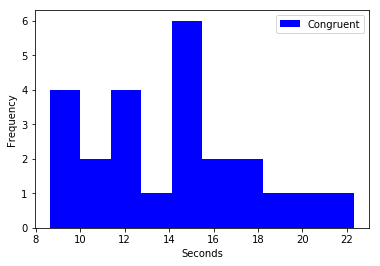

In [3]:
df.plot.hist(x='index', y='Congruent', color='Blue', label='Congruent').set(xlabel="Seconds")

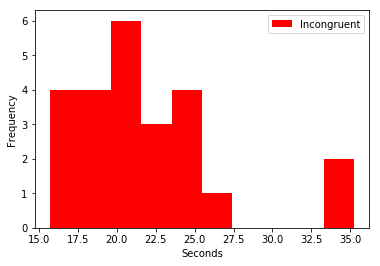

In [4]:
df.plot.hist(x='index', y='Incongruent', color='Red', label='Incongruent').set(xlabel="Seconds")

I can observe incongruent takes more time than congruent in general.

[<matplotlib.text.Text at 0x93d2ff0>, <matplotlib.text.Text at 0x93be150>]

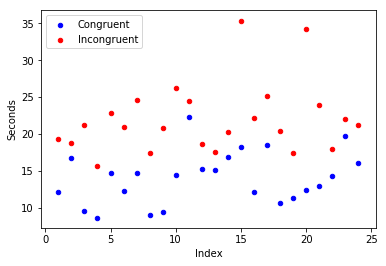

In [5]:
ax = df.plot.scatter(x='index', y='Congruent', color='Blue', label='Congruent')
df.plot.scatter(x='index', y='Incongruent', color='Red', label='Incongruent', ax=ax).set(xlabel="Index", ylabel="Seconds")

I can observe none in the group of congruent exceeds any in the group incongruent. 

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

I would set confidence level to 99%, two sided tail.

degree of freedom = sample size - 1 = 23

Tail probablity p = +-2.807

In [6]:
#Sample size
n = len(df)
n

24

In [7]:
#Point Estimate
pe = df['Incongruent'].mean() - df['Congruent'].mean()
pe

7.964791666666665

In [8]:
#sample difference
df['difference'] = df['Incongruent'] - df['Congruent']
df.head()

,index,Congruent,Incongruent,difference
0,1,12.079,19.278,7.199
1,2,16.791,18.741,1.950
2,3,9.564,21.214,11.650
3,4,8.630,15.687,7.057
4,5,14.669,22.803,8.134


In [9]:
#difference
difference = df['difference'] - df['difference'].mean()
df['squared_Difference'] = difference * difference
df.head()

,index,Congruent,Incongruent,difference,squared_Difference
0,1,12.079,19.278,7.199,0.586437
1,2,16.791,18.741,1.950,36.177719
2,3,9.564,21.214,11.650,13.580760
3,4,8.630,15.687,7.057,0.824086
4,5,14.669,22.803,8.134,0.028631


In [10]:
#sum
sum_ = df['squared_Difference'].sum()
sum_

544.3304399583335

In [11]:
#variance
v = sum_/(n-1)
v

23.666540867753632

In [12]:
#standard deviation
s = sqrt(v)
s

4.8648269103590556

In [13]:
#t-statistic
t = pe/(s/(sqrt(n)))
t

8.0207069441099552

t-statistic - t-critical = 8.021 - 2.807 = 5.214

#### Conclusion
Since t-statistic > t-critical, we reject the null hypothesis at a 1% level of significance. We conclude that when the name of a color is printed in a color that is not denoted by the name, naming the color of the word DOES take longer. It is expected because Stroop effect is already proven.